In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Model libriaries 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.naive_bayes import CategoricalNB



Examining the Data

In [75]:
# Read the data
data = pd.read_csv("star_classification.csv")

In [68]:
data.shape

(100000, 18)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [70]:
data["class"].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [76]:
# Replace class label "QSO" to "QUASARS"
data['class'].replace("QSO","QUASARS",inplace=True)

C:\Users\jenil\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


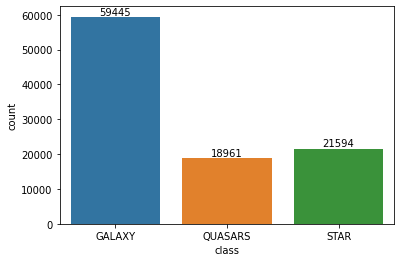

In [77]:
plot = sns.countplot(data["class"], label="Count")
plot.bar_label(plot.containers[0])
plt.show()

Preprocessing Data

In [78]:
print(data["class"].value_counts())
# Get class count
galaxy_count, star_count, qso_count = data["class"].value_counts()

# divide by classs
galaxy_class = data[data["class"] == "GALAXY"]
star_class = data[data["class"] == "STAR"]
qso_class = data[data["class"] == "QUASARS"]

# Under sampling the Galaxy class because the dataset is too imbalanced
galaxy_class_under = galaxy_class.sample(star_count)

# Concat all the data
data = pd.concat([galaxy_class_under, star_class, qso_class],axis=0)

data.shape

GALAXY     59445
STAR       21594
QUASARS    18961
Name: class, dtype: int64


(62149, 18)

C:\Users\jenil\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


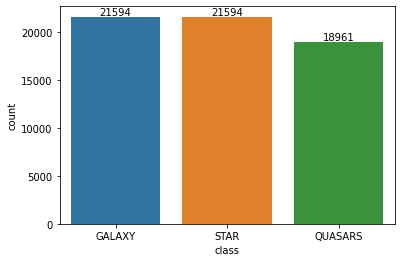

In [79]:
plot = sns.countplot(data["class"], label="Count")
plot.bar_label(plot.containers[0])
plt.show()

In [52]:
# Dropping columns that are IDs or timestamp
data = data.drop(['obj_ID','field_ID','run_ID','rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'MJD', 'fiber_ID', 'alpha', 'delta', 'plate'], axis=1) 

In [53]:
# Finding duplicate
duplicate = data[data.duplicated()]
duplicate

,u,g,r,i,z,class,redshift


In [54]:
# Replace class label "QSO" to "QUASARS"
data['class'].replace("QSO","QUASARS",inplace=True)

In [55]:
# Extract data label
classData = data["class"]

# Drop the class label
data.drop(["class"],axis=1, inplace=True)

In [56]:
#Scale the data
'''
NOTE: You can make this optional, scaling helped improve the accuracy. Try with scaling and without it
'''
data = scale(data)

Data Splitting

In [58]:
def split_data(train_size, valid_size, data, label):
    # Train-Test datasplit
    dataTrain, dataTest, classTrain, classTest = train_test_split(data, label, train_size=train_size, random_state=1, stratify=label)

    #Train-Validation datasplit
    dataTrain, dataValid, classTrain, classValid = train_test_split(dataTrain, classTrain, test_size=valid_size, random_state=1, stratify=classTrain)
    
    print("Train: ", dataTrain.shape[0])  
    print(classTrain.value_counts())
    print("Validation: ", dataValid.shape[0])  
    print(classValid.value_counts())
    print("Test: ", dataTest.shape[0])  
    print(classTest.value_counts())
    print("Dataset Size: ", data.shape[0])  
    
    return (dataTrain, dataValid, dataTest, classTrain, classValid, classTest)

In [59]:
# Split the data
dataTrain, dataValid, dataTest, classTrain, classValid, classTest = split_data(train_size=0.8, valid_size=0.2, data=data, label=classData)

Train:  39775
GALAXY     13820
STAR       13820
QUASARS    12135
Name: class, dtype: int64
Validation:  9944
GALAXY     3455
STAR       3455
QUASARS    3034
Name: class, dtype: int64
Test:  12430
STAR       4319
GALAXY     4319
QUASARS    3792
Name: class, dtype: int64
Dataset Size:  62149


Helper Methods

In [22]:
def predict(model, data, label):
    predict = model.predict(data)
    accuracy = accuracy_score(label, predict)
    
    print(classification_report(label,predict))
    
    return accuracy

In [13]:
def confusion_matrix(model, data, label):
    predict = model.predict(data)
    return confusion_matrix(label, predict)

Neural Network

In [84]:
def NeuralNetwork(data, classData, iteration=200, hidden_layers=1, layer_size=100):
    clf = MLPClassifier(hidden_layer_sizes=(layer_size,hidden_layers),max_iter=iteration)
    clf = clf.fit(data, classData)
    
    return clf


In [85]:
# Training the model and predicting on test data
NNModel = NeuralNetwork(dataTrain, classTrain, iteration=1000, hidden_layers=1, layer_size=50)
accuracy = predict(NNModel, dataTest, classTest)

print(accuracy)

0.9734


0.9726875


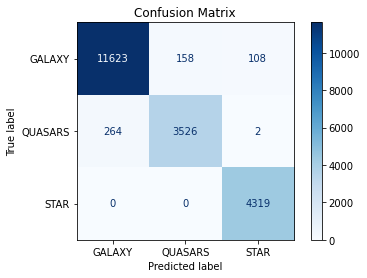

In [88]:
# predicting on validation data
accuracy = predict(NNModel, dataValid, classValid)
print(accuracy)

dsp = ConfusionMatrixDisplay.from_estimator(
    NNModel,
    dataTest,
    classTest,
    display_labels=['GALAXY', 'QUASARS', 'STAR'],
    cmap=plt.cm.Blues
)

dsp.ax_.set_title("Confusion Matrix")
plt.show()

In [17]:
# Test Accuracy vs Iterations
testAcc = []
trainAcc = []
validAcc = []

for iteration in range(100, 1001, 100):
    NNModel = NeuralNetwork(dataTrain, classTrain, iteration=iteration, hidden_layers=1, layer_size=32)
    
    # Training Accuracy
    accuracy = predict(NNModel, dataTrain, classTrain)
    trainAcc.append(accuracy)
    
    # Test Accuracy
    accuracy = predict(NNModel, dataTest, classTest)
    testAcc.append(accuracy)
    
    # Validation Accuracy
    accuracy = predict(NNModel, dataValid, classValid)
    validAcc.append(accuracy)


C:\Users\jenil\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jenil\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0, 0.5, 'Accuracy')

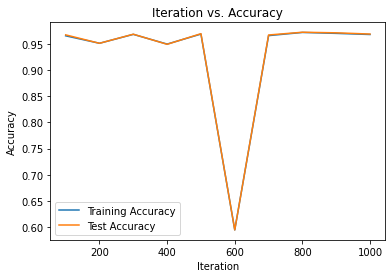

In [19]:
iteration = list(range(100,1001,100))

plt.plot(iteration,trainAcc,'-',iteration,testAcc,'-')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.title("Iteration vs. Accuracy")
plt.xlabel('Iteration')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

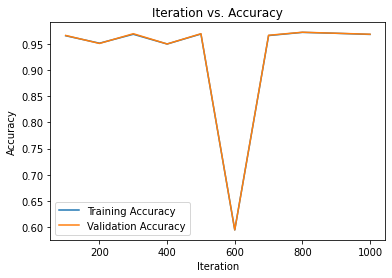

In [25]:
plt.plot(iteration,trainAcc,'-',iteration,validAcc,'-')
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title("Iteration vs. Accuracy")
plt.xlabel('Iteration')
plt.ylabel('Accuracy')

K-Nearest Neighbour

In [62]:
# Test Accuracy vs Iterations
testAcc = []
trainAcc = []
validAcc = []

for k in range(1,30):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN = KNN.fit(dataTrain, classTrain)
    
    # Training Accuracy
    accuracy = predict(KNN, dataTrain, classTrain)
    trainAcc.append(accuracy)
    
    # Test Accuracy
    accuracy = predict(KNN, dataTest, classTest)
    testAcc.append(accuracy)
    
    # Validation Accuracy
    accuracy = predict(KNN, dataValid, classValid)
    validAcc.append(accuracy)
    
    print("Completed ", k, "/30")

              precision    recall  f1-score   support

      GALAXY       1.00      1.00      1.00     13820
     QUASARS       1.00      1.00      1.00     12135
        STAR       1.00      1.00      1.00     13820

    accuracy                           1.00     39775
   macro avg       1.00      1.00      1.00     39775
weighted avg       1.00      1.00      1.00     39775

              precision    recall  f1-score   support

      GALAXY       0.94      0.93      0.94      4319
     QUASARS       0.94      0.94      0.94      3792
        STAR       0.98      0.99      0.99      4319

    accuracy                           0.96     12430
   macro avg       0.96      0.96      0.96     12430
weighted avg       0.96      0.96      0.96     12430

              precision    recall  f1-score   support

      GALAXY       0.93      0.92      0.93      3455
     QUASARS       0.93      0.93      0.93      3034
        STAR       0.98      0.99      0.98      3455

    accuracy        

In [60]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN = KNN.fit(dataTrain, classTrain)

In [61]:
predict(KNN, dataTest, classTest)

              precision    recall  f1-score   support

      GALAXY       0.95      0.95      0.95      4319
     QUASARS       0.96      0.94      0.95      3792
        STAR       0.98      1.00      0.99      4319

    accuracy                           0.96     12430
   macro avg       0.96      0.96      0.96     12430
weighted avg       0.96      0.96      0.96     12430



0.963716814159292

Text(0, 0.5, 'Accuracy')

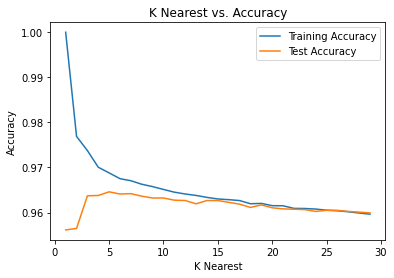

In [64]:
k = list(range(1,30))

plt.plot(k,trainAcc,'-',k,testAcc,'-')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.title("K Nearest vs. Accuracy")
plt.xlabel('K Nearest')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

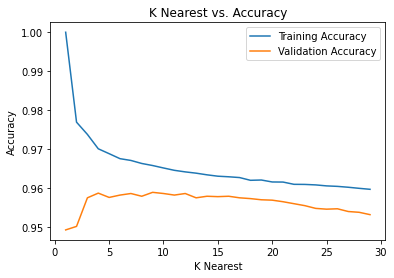

In [65]:
k = list(range(1,30))

plt.plot(k,trainAcc,'-',k,validAcc,'-')
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title("K Nearest vs. Accuracy")
plt.xlabel('K Nearest')
plt.ylabel('Accuracy')